# Analysis on Agent Response Rate and Time

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
convo = pd.read_csv("conversations-20171204.csv")

In [3]:
convo.head(3)

,conversationID,adminName,replied,adminEmail,adminID,started
0,layer:conversations00049fd1-95ca-4d9a-b137-813...,Tay Chai Huat (Josh),0,taychaihuat@hotmail.com,83269,1512094520
1,layer:conversations001988e7-1c8d-4576-8ecc-f33...,Lawrence Lim,0,law_sea_properties@hotmail.sg,185039,1511924282
2,layer:conversations0029a632-2dc4-42f9-ad1a-df5...,Cheryl Aw,1512144832,awcheryl88@gmail.com,285722,1512139093


In [4]:
convo.columns = ['convo id','name','replied','email','admin id','started']
convo.head(3)

,convo id,name,replied,email,admin id,started
0,layer:conversations00049fd1-95ca-4d9a-b137-813...,Tay Chai Huat (Josh),0,taychaihuat@hotmail.com,83269,1512094520
1,layer:conversations001988e7-1c8d-4576-8ecc-f33...,Lawrence Lim,0,law_sea_properties@hotmail.sg,185039,1511924282
2,layer:conversations0029a632-2dc4-42f9-ad1a-df5...,Cheryl Aw,1512144832,awcheryl88@gmail.com,285722,1512139093


In [7]:
convo_email = convo[convo['replied']!=0].groupby('email')
convo_email['replied'].count().sort_values(ascending=False).head()

email
chriskohkk@gmail.com            5
gerald.outofthebox@gmail.com    5
desmondliu.era@gmail.com        5
Bernardteo.era@gmail.com        5
alan1tsui@yahoo.com.sg          5
Name: replied, dtype: int64

# Agent Response Rate

In [25]:
all_agent = convo.groupby('email').count()

Text(0.5,0,'enq')

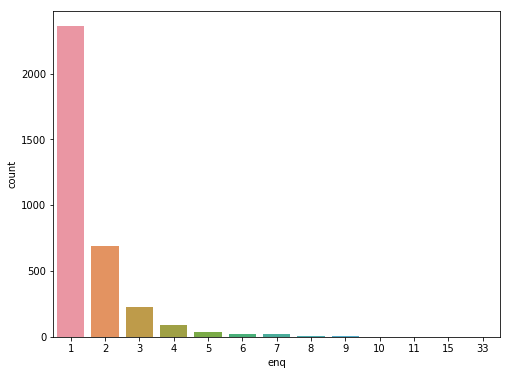

In [36]:
plt.figure(figsize=(8,6))
sns.countplot(all_agent['started'].sort_values(ascending=False))
plt.xlabel('enq')

In [43]:
all_agent[all_agent['started'] == 1]['started'].count() / all_agent['started'].count()

0.68375325803649001

In [44]:
all_agent[all_agent['started'] == 33]['started']

email
sweesiongaw@gmail.com    33
Name: started, dtype: int64

In [360]:
agent_res = convo_email['replied'].count() / all_agent['replied'] * 100
agent_res = agent_res.dropna()
agent_res.describe()

count    718.000000
mean      83.425631
std       24.973001
min        6.666667
25%       57.857143
50%      100.000000
75%      100.000000
max      100.000000
Name: replied, dtype: float64

In [376]:
agent_res.sort_values(ascending=False).to_csv('agent res.csv',sep=',')

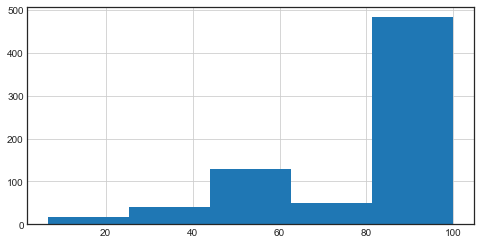

In [362]:
plt.figure(figsize=(8,4))
agent_res.sort_values(ascending=False).hist(bins=5)

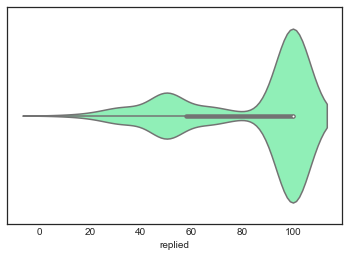

In [363]:
sns.violinplot(agent_res.sort_values(ascending=False),palette='rainbow')

# Replied Conversations 

In [237]:
convo['replied'].count()

5379

In [238]:
convo[convo['replied']!=0]['replied'].count()

967

In [239]:
convo_res = convo[convo['replied']!=0]['replied'].count() / convo['replied'].count() * 100
convo_res

17.977319204313069

# Response Time

In [45]:
res = pd.read_csv('agent-responsiveness-20171204.csv')

In [46]:
res.shape

(718, 5)

In [47]:
res.head(3)

,averageResponse,name,responseSeconds,numberOfConversations,emailId
0,309.000000,Alan Yap,309,1,alanyap7@gmail.com
1,94397.333333,Ashley Chia,283192,3,clj.ashley@gmail.com
2,32515.000000,Christopher Ng,130060,4,jasmine.chan@orangetee.com


In [48]:
res.columns = ['avg_res','name','res_sec','convo_no','email']
res.head(3)

,avg_res,name,res_sec,convo_no,email
0,309.000000,Alan Yap,309,1,alanyap7@gmail.com
1,94397.333333,Ashley Chia,283192,3,clj.ashley@gmail.com
2,32515.000000,Christopher Ng,130060,4,jasmine.chan@orangetee.com


In [49]:
res['res_h'] = res['res_sec'].div(3600) / res['convo_no']
res[res['convo_no']==2].head(3)

,avg_res,name,res_sec,convo_no,email,res_h
3,59.5,Jack Teo,119,2,jackwtteo@yahoo.com.sg,0.016528
13,67028.5,Rennie Goh 吴蕊玲,134057,2,renniegoh_property@hotmail.com,18.619028
23,168358.5,Ginn Chia 谢佩玲,336717,2,ginnchia@gmail.com,46.766250


In [50]:
res.describe()

,avg_res,res_sec,convo_no,res_h
count,718.000000,718.000000,718.000000,718.000000
mean,53265.785956,73737.681058,1.346797,14.796052
std,70667.681124,111606.654813,0.736238,19.629911
min,8.000000,8.000000,1.000000,0.002222
25%,2530.750000,2819.750000,1.000000,0.702986
50%,22758.375000,28464.500000,1.000000,6.321771
75%,75782.750000,94858.500000,1.000000,21.050764
max,363111.000000,926430.000000,5.000000,100.864167


In [370]:
res['res_h'].median()

6.321770833333334

In [54]:
res[res['email']=='sweesiongaw@gmail.com']

,avg_res,name,res_sec,convo_no,email,res_h


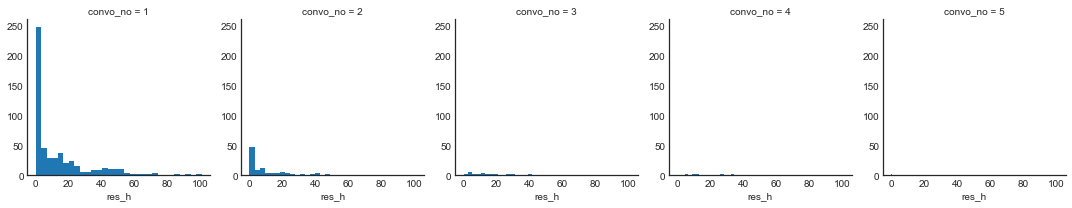

In [250]:
sns.set_style('white')
g = sns.FacetGrid(data=res, col='convo_no',size=3, aspect=1)
g.map(plt.hist, 'res_h', bins=30)

In [251]:
convo5 = res[res['convo_no']==5][['name','convo_no','email','res_h']]
convo5

,name,convo_no,email,res_h
5,Gerald Chan,5,gerald.outofthebox@gmail.com,11.198278
78,Alan Tsui 徐先生,5,alan1tsui@yahoo.com.sg,0.842333
96,Chris Koh,5,chriskohkk@gmail.com,25.944556
582,Bernard Teo,5,Bernardteo.era@gmail.com,0.015333
594,Desmond Liu,5,desmondliu.era@gmail.com,5.297389


In [371]:
convo5['res_h'].mean()

8.659577777777777

In [372]:
res.groupby('convo_no')['res_h'].mean()

convo_no
1    14.475467
2    14.793452
3    17.923764
4    21.102741
5     8.659578
Name: res_h, dtype: float64

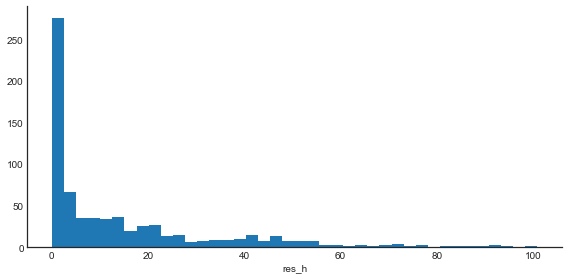

In [373]:
g = sns.FacetGrid(data=res, size=4, aspect=2)
g.map(plt.hist, 'res_h', bins=40)

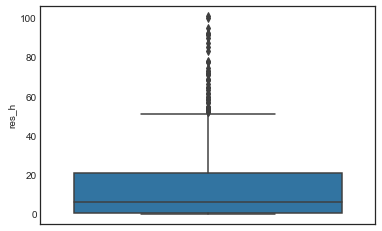

In [110]:
sns.boxplot(data=res,y='res_h')

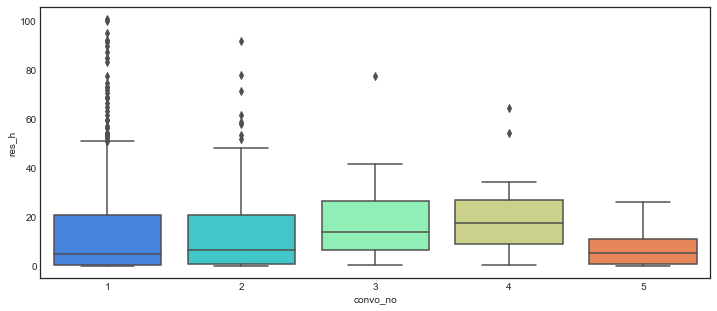

In [375]:
plt.figure(figsize=(12,5))
sns.boxplot(data=res, x='convo_no',y='res_h',palette='rainbow')

In [97]:
res[res['res_h'] <= 2]['res_h'].count() / res['res_h'].count()*100

36.350974930362121

In [98]:
res[res['res_h'] <= 24]['res_h'].count() / res['res_h'].count()*100

78.272980501392752

In [99]:
res[res['res_h']>48]['res_h'].count() / res['res_h'].count()

0.077994428969359333

In [100]:
res.iloc[res['res_h'].idxmax(),:]

avg_res                        363111
name                        Lily Wang
res_sec                        363111
convo_no                            1
email       lilylijun2000@hotmail.com
res_h                         100.864
Name: 402, dtype: object

In [101]:
res.iloc[res['res_h'].idxmin(),:]

avg_res                              8
name                      Raymond Tung
res_sec                              8
convo_no                             1
email       raymond.tung.era@gmail.com
res_h                       0.00222222
Name: 253, dtype: object

# Export Data

In [102]:
more_than_24 = res[res['res_h'] > 24][['email','res_h']]
more_than_24.to_csv('more_than_24.csv',sep=',',index=False)

In [103]:
no_response = convo[convo['replied']==0][['email','name']]
no_response.to_csv('no_response.csv',sep=',',index=False)

In [123]:
within_2h = res[res['res_h'] <=2][['name','email','res_h']]
within_2h.to_csv('within_2h.csv',sep=',',index=False)